## <span style="color:Blue">Overview and Motivation</span>
#### This notebook contains data engineering tasks done on the google playstore apps dataset. In this notebook we try to find some answers for some questions an app producer may ask. Here we help app producers understand the features which affect customer statisfication. We aim at finding relationships between some app features and the app rating. This may help app producers reach high customer satisfaction.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

## <span style="color:Blue">Initial Questions</span>
#### The inital question to investigate this dataset of android apps is to figure out which attriubutes has an effect or a correlation with the rating of each app. The rating of apps is the column of interest as it reflects how efficient the app is.

#### The questions asked to reach that goal are:-

#### 1. Does the rating depends on the category of the app? Are there any categories of apps that get the highest ratings?

#### 2. Is the number of reviews on an app reflect that this app is interesting to the users? Is there a correlation between the number of reviews and the rating of the app?

#### 3. Does the size of an app makes the users give it higher ratings? Do small apps have higher ratings than larger apps?

#### 4. Is the rating dependent on the number of installs or the content rating ?

#### 5. Does the type or price of the app have any correlation with the rating of the app?

#### 6. Are there any genres of apps that get the highest or lowest ratings?

#### 7. Does the date when the app was last updated reflects how often is the app being maintained and thus has a relation with its rating?

#### 8. Is the current version of the app or the android version that it requires has an effect on its rating?

In [2]:
dataSet = pd.read_csv("./googleplaystore.csv")
dataSet.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Part 1: Data Inspection & outlier Removal

In [3]:
print(dataSet.shape)

(10841, 13)


The Data has 10841 Records and 13 features.

In [4]:
total = dataSet.isnull().sum().sort_values(ascending=False)
total

Rating            1474
Current Ver          8
Android Ver          3
Content Rating       1
Type                 1
Last Updated         0
Genres               0
Price                0
Installs             0
Size                 0
Reviews              0
Category             0
App                  0
dtype: int64

### Rating

The rating has the largest number of missing values

In [5]:
dataSet['Rating'].describe()

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

The describe show that the Rating column has mean of 4.19 , a min of 1 and max of 19.
The count of non null values is 9367 which means 10841-9367=1474 null values for the rating.

In [6]:
dataSet['Rating'].value_counts()

4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.6       25
2.7       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
2.1        8
1.7        8
1.8        8
1.6        4
1.4        3
1.5        3
1.2        1
19.0       1
Name: Rating, dtype: int64

### <span style="color:Green"> The value 19 is an outlier to the rating range so it will be replaced by nan for now.</span>

In [7]:
dataSet[dataSet['Rating']==19].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [8]:
dataSet['Rating']=dataSet['Rating'].replace(19,np.NaN)
dataSet['Rating'].value_counts().tail()

1.8    8
1.6    4
1.4    3
1.5    3
1.2    1
Name: Rating, dtype: int64

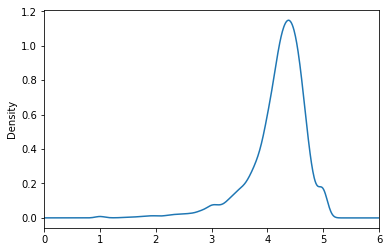

In [9]:
dataSet.Rating.dropna().plot(kind='kde', xlim=(0,6))

### Conclusion
Most app ratings are concentrated between 3-5.

## Category

In [10]:
categories=dataSet['Category'].unique()
categories

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [11]:
dataSet.describe(include=[np.object])['Category']

count      10841
unique        34
top       FAMILY
freq        1972
Name: Category, dtype: object

In [12]:
len(categories)

34

In [13]:
dataSet['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

#### We have 34 unique Categories
#### The 1.9 value is an OUTLIER so its record will be removed

In [14]:
dataSet[dataSet['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,NaN,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [15]:
dataSet=dataSet[dataSet['Category']!='1.9']

In [16]:
dataSet['Category'].value_counts().tail()

ART_AND_DESIGN    65
EVENTS            64
COMICS            60
PARENTING         60
BEAUTY            53
Name: Category, dtype: int64

#### Category 1.9 is now removed

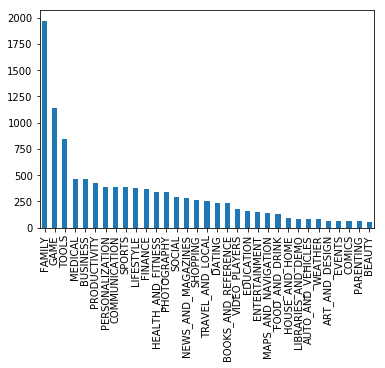

In [17]:
dataSet['Category'].value_counts().plot(kind='bar')

#### The family category is the most frequent category.

### Genres

In [18]:
Genres=dataSet['Genres'].unique()
Genres

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [19]:
dataSet.describe(include=[np.object])['Genres']

count     10840
unique      119
top       Tools
freq        842
Name: Genres, dtype: object

In [20]:
dataSet['Genres'].value_counts()

Tools                                  842
Entertainment                          623
Education                              549
Medical                                463
Business                               460
Productivity                           424
Sports                                 398
Personalization                        392
Communication                          387
Lifestyle                              381
Finance                                366
Action                                 365
Health & Fitness                       341
Photography                            335
Social                                 295
News & Magazines                       283
Shopping                               260
Travel & Local                         257
Dating                                 234
Books & Reference                      231
Arcade                                 220
Simulation                             200
Casual                                 193
Video Playe

#### <span style="color:Red">  As seen the sub-genres (ones after;) in some cases have very low frequencies, so the sub-genres will be removed and will only leave main genres in order no to affect the rating distribution.</span>

In [21]:
dataSet['Genres'] = dataSet['Genres'].str.split(';').str[0]

In [22]:
dataSet['Genres'].value_counts()

Tools                      843
Entertainment              667
Education                  645
Medical                    463
Business                   460
Productivity               424
Sports                     402
Personalization            392
Communication              388
Lifestyle                  383
Action                     382
Finance                    366
Health & Fitness           343
Photography                335
Social                     295
News & Magazines           283
Casual                     270
Shopping                   260
Travel & Local             258
Arcade                     237
Books & Reference          234
Dating                     234
Simulation                 218
Video Players & Editors    178
Puzzle                     167
Maps & Navigation          137
Food & Drink               127
Role Playing               123
Racing                     119
Educational                112
Strategy                   111
Adventure                   91
House & 

#### <span style="color:blue">Music and Audio is considered as an outlier, so it will be replaced by Music</span>

In [23]:
dataSet[dataSet['Genres']=='Music & Audio']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2142,Toy Guitar with songs for kids,FAMILY,4.3,1369,9.8M,"500,000+",Free,0,Everyone,Music & Audio,"March 5, 2016",1.0.3,2.3 and up


In [24]:
newGenres=dataSet['Genres'].replace(to_replace='Music & Audio',value="Music")

In [25]:
dataSet['Genres']=newGenres

In [26]:
dataSet['Genres'].value_counts().tail()

Card      51
Casino    39
Trivia    39
Word      29
Music     26
Name: Genres, dtype: int64

In [27]:
dataSet['Genres'].unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Video Players & Editors', 'Medical', 'Social', 'Shopping',
       'Photography', 'Travel & Local', 'Tools', 'Personalization',
       'Productivity', 'Parenting', 'Weather', 'News & Magazines',
       'Maps & Navigation', 'Casino'], dtype=object)

In [28]:
len(dataSet['Genres'].unique())

47

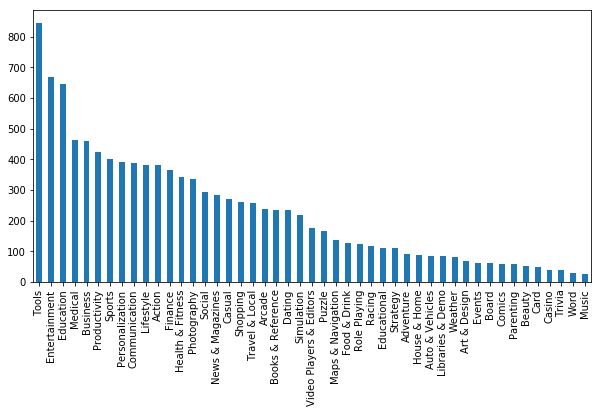

In [29]:
dataSet['Genres'].value_counts().plot(kind='bar', figsize=(10,5))

#### <span style="color:green">Music and Audio is replaced by Music</span>

## Relation between Category and Genres with Rating

### Imputing the Null values of Rating by cluster mean based on the Category attribute   

In [30]:
# first we group the rows by Category
groupedDataSet= dataSet.groupby(["Category"],as_index=False)

In [31]:
# Then we aggregate Rating per Category by MEAN
aggregatedData=groupedDataSet.aggregate({"Rating":'mean'})

In [32]:
aggregatedData.Rating

0     4.358065
1     4.190411
2     4.278571
3     4.346067
4     4.121452
5     4.155172
6     4.158537
7     3.970769
8     4.389032
9     4.126174
10    4.435556
11    4.192272
12    4.131889
13    4.166972
14    4.286326
15    4.277104
16    4.197368
17    4.178462
18    4.094904
19    4.051613
20    4.189143
21    4.132189
22    4.300000
23    4.335987
24    4.192114
25    4.211396
26    4.259664
27    4.255598
28    4.223511
29    4.047411
30    4.109292
31    4.063750
32    4.244000
Name: Rating, dtype: float64

In [33]:
def getRatingValue(data,category):
    for row in data.iterrows():
        #print(row[1].Category)
        if(row[1].Category==category):
            return row[1].Rating

In [34]:
RatingImputed = [] # define array structure
for row in dataSet.iterrows():
    rating=row[1].Rating
    #print('old',rating)
    if(pd.isnull(rating)):
        rating=getRatingValue(aggregatedData,row[1].Category)
        round(rating,1)
        #print('new',rating)
    RatingImputed.append(round(rating,1))

In [35]:
dataSet['Rating'] = RatingImputed
dataSet

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design,"July 3, 2018",2.8,4.0.3 and up


In [36]:
total = dataSet.isnull().sum().sort_values(ascending=False)
total

Current Ver       8
Android Ver       2
Type              1
Last Updated      0
Genres            0
Content Rating    0
Price             0
Installs          0
Size              0
Reviews           0
Rating            0
Category          0
App               0
dtype: int64

In [37]:
dataSet.describe()

,Rating
count,10840.000000
mean,4.189862
std,0.480172
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


#### <span style="color:violet">Now the records with null values in the rating has been imputed by Cluster Mean</span>

### Rating and Category

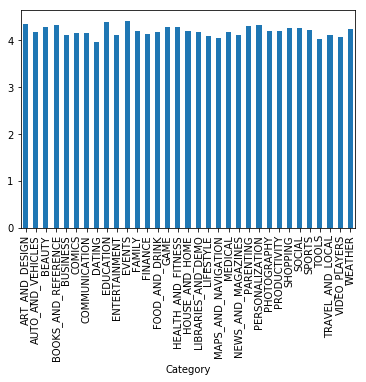

In [38]:
dataSet.groupby('Category').Rating.mean().plot(kind='bar')

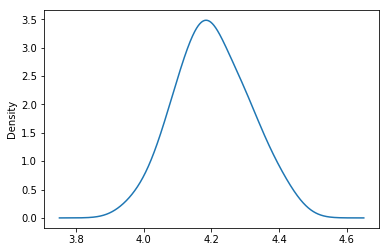

In [39]:
dataSet.groupby('Category').Rating.mean().plot(kind='kde')

#### <span style="color:Green">The bar chart with the rating mean for each category failed to show the distribution clearly so a box plot will be used</span>

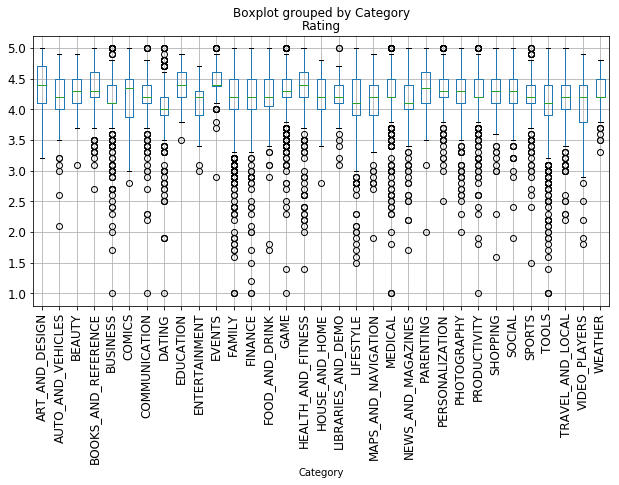

In [40]:
dataSet.boxplot(column='Rating', by='Category',rot=90, fontsize=12, figsize=(10,5), grid=True)

#### <span style="color:Green">As shown, the average rating of each category is nearly the same, in general rating between categories is not that differet</span>

### Genres

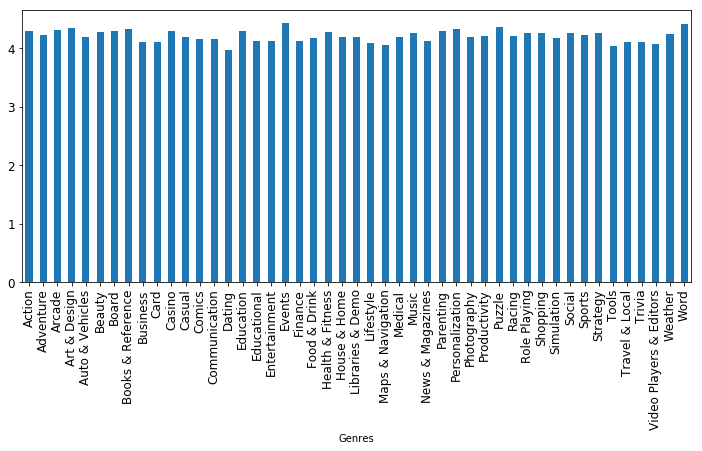

In [41]:
dataSet.groupby('Genres').Rating.mean().plot(kind='bar',figsize=(12,5),fontsize=12)

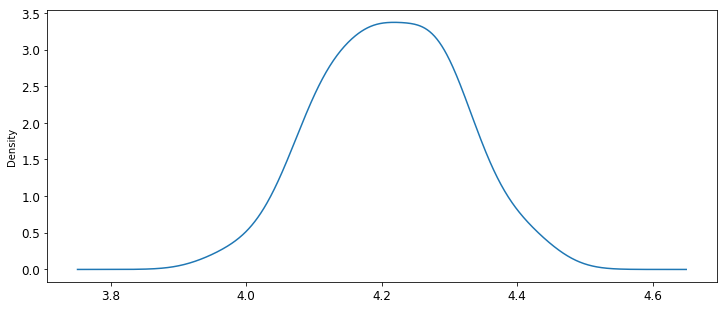

In [42]:
dataSet.groupby('Genres').Rating.mean().plot(kind='kde',figsize=(12,5),fontsize=12)

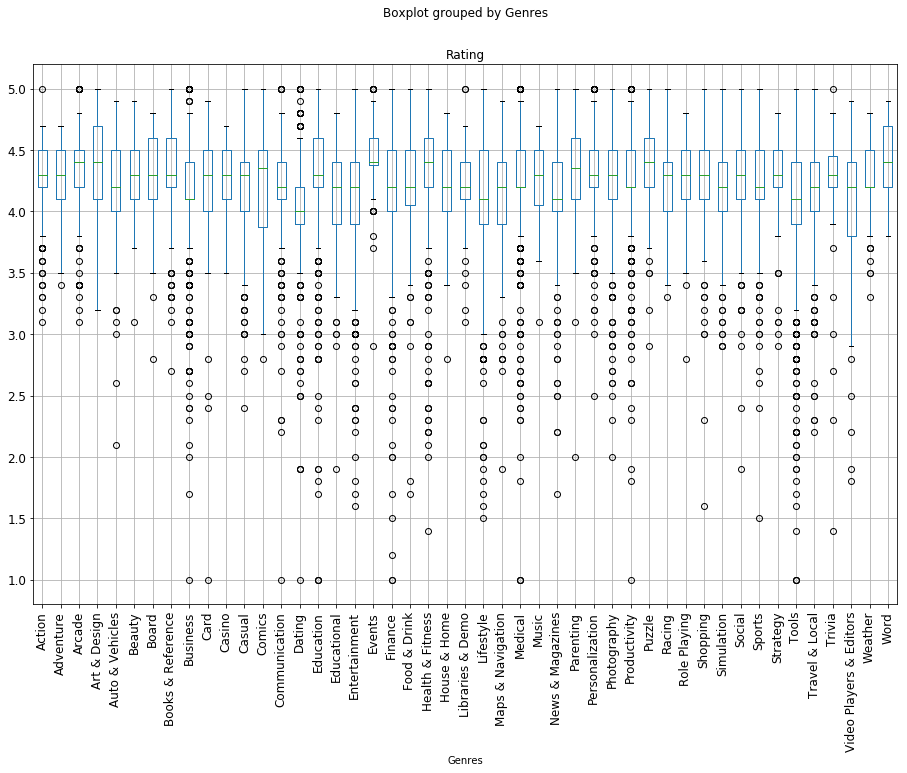

In [43]:
dataSet.boxplot(column='Rating', by='Genres',rot=90, fontsize=12, figsize=(15,10), grid=True)

#### <span style="color:Green">The Genres showed the same behaviour as category</span>

### Investigating if the genres within a category affects rating

In [44]:
dataSet.groupby(['Category','Genres']).size().reset_index().rename(columns={0:'count'})

,Category,Genres,count
0,ART_AND_DESIGN,Art & Design,65
1,AUTO_AND_VEHICLES,Auto & Vehicles,85
2,BEAUTY,Beauty,53
3,BOOKS_AND_REFERENCE,Books & Reference,231
4,BUSINESS,Business,460
5,COMICS,Comics,60
6,COMMUNICATION,Communication,387
7,DATING,Dating,234
8,EDUCATION,Education,156
9,ENTERTAINMENT,Entertainment,149


#### <span style="color:Green">Only family and Game have different genres within their category which means that the invistigation cannot be globalized</span>

### Content Rating
#### Cleaning up Content Rating

In [45]:
# Treat nan values as Unrated so Everyone can use it
# Fill nan values with Everyone
dataSet["Content Rating"] = dataSet["Content Rating"].fillna('Everyone')
# Replace Unrated value with Everyone
dataSet.loc[dataSet['Content Rating'] == 'Unrated', 'Content Rating'] = 'Everyone'
print(dataSet.isnull().sum())
# No more nulls in Content Rating column

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64


### Relation between Rating and Content Rating

### Calculate Correlation between content rating and app rating¶

Index(['Rating', 'Adults only 18+', 'Everyone', 'Everyone 10+', 'Mature 17+',
       'Teen'],
      dtype='object')
[[ 1.          0.00381652 -0.02145969  0.02716377 -0.03185175  0.03153392]
 [ 0.00381652  1.         -0.03370447 -0.00331549 -0.0036549  -0.00589225]
 [-0.02145969 -0.03370447  1.         -0.40366646 -0.44499011 -0.71739209]
 [ 0.02716377 -0.00331549 -0.40366646  1.         -0.0437734  -0.07056942]
 [-0.03185175 -0.0036549  -0.44499011 -0.0437734   1.         -0.07779367]
 [ 0.03153392 -0.00589225 -0.71739209 -0.07056942 -0.07779367  1.        ]]


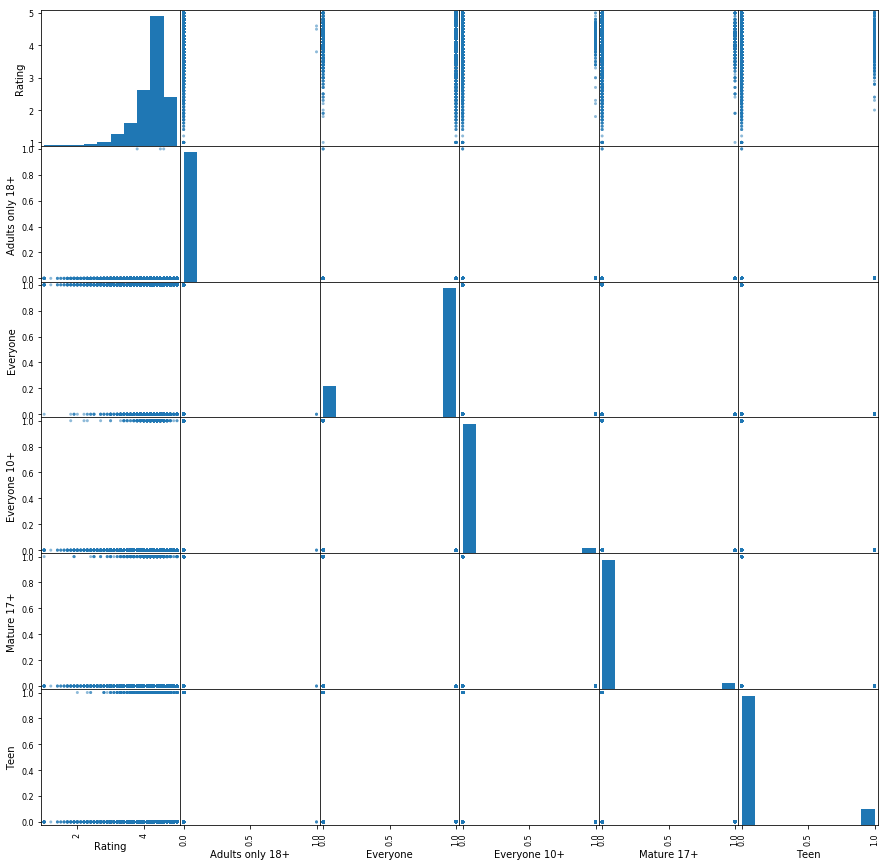

In [46]:
# Change Categorical Content Rating attribute to numerical
df_dummies = pd.get_dummies(dataSet['Content Rating'])
df_new = pd.concat([dataSet["Rating"], df_dummies], axis=1)
print(df_new.columns)
x = df_new.values
correlation_matrix = np.corrcoef(x.T)
print(correlation_matrix)
pd.plotting.scatter_matrix(df_new, figsize=(15, 15))
plt.show()

#### <span style="color:Green"> As results show, no sigificant correlation between Content Rating and app Rating</span>

### Mean rating for each content rating category

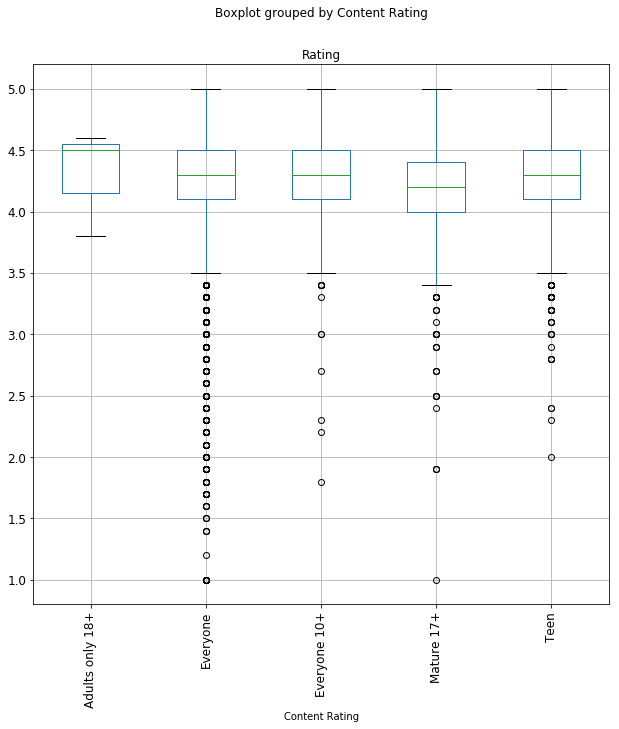

In [47]:
dataSet.boxplot(column='Rating', by='Content Rating',rot=90, fontsize=12, figsize=(10,10), grid=True)

#### <span style="color:Green"> As we can see the mean Rating of each content rating is very near to each other with range (4.1 - 4.2) except for Adults and Teens its mean is higher than others with range(4.3 - 4.5). We can conclude that apps with smaller targeted group "Content Rating" have higher probability of getting higher rating than other apps with wider targeted group. </span>

### Current Version
#### In this part we will try to extract number of versions an app produced till the time this dataset was recorded, according to the following steps:-
1. neglect versions with nan value
2. take the first part of the version value for example if version = 1.1.9 then new version will be 1
3. if a version starts with 0 then replace it with one as some apps start counting from 0
4. neglect versions that start with alphabets

In [ ]:
# Number of records before exclusions
records_before = dataSet.shape[0]
print(dataSet.shape[0])
# Step 1
numberOfVersionProduced = dataSet[pd.notnull(dataSet['Current Ver'])]
# Extract Rating and Current Ver only
numberOfVersionProduced = numberOfVersionProduced[['Current Ver','Rating']]
# Step 2
numberOfVersionProduced['Current Ver'] = numberOfVersionProduced['Current Ver'].str.split(".", n = 1, expand = True)
# Step 3
numberOfVersionProduced[numberOfVersionProduced['Current Ver'] == 0] = '1'
print(numberOfVersionProduced['Current Ver'].unique())
# Step 4
numberOfVersionProduced = numberOfVersionProduced[numberOfVersionProduced['Current Ver'].str.isnumeric()]
print(numberOfVersionProduced['Current Ver'].unique())
# Change column types to integer in order to calculate Correlation 
numberOfVersionProduced['Current Ver'] = numberOfVersionProduced['Current Ver'].astype(int)
numberOfVersionProduced['Rating'] = numberOfVersionProduced['Rating'].astype(int)
# Calculate Remaining dataset percentage 
print((numberOfVersionProduced.shape[0]/records_before)*100)

10840
['1' '2' 'Varies with device' '6' '3' '5' '4' '11' '0' '8' '10' '18' '9'
 '15' '14' '7' '99' '12' '37' '24' '47' 'R6' '69' '42' '196' '2018' '20'
 '13' 'v1' '01' '43' '16' 'Cannonau 3' 'p5' '112' 'Public' '220' '858'
 'v3' 'Version:6' '02' '3196' '5423' '19' '1_39_93' '79' '108' '57' '60'
 '149' '37893' '20180609' '28' '25' '300000' 'PN' 'Initial' 'T4' '50' '27'
 '29' '584' '22' '71' '1004' '06' '2017' '17' '53' 'v5' 'MyMetro_HTML_2'
 'v8' 'v7' '32' '20180517' 'v150' '40' '68' 'FreeTimeApp-aosp_v3'
 'Natalia Studio Development' '30' '116' '04' '27500000' 'version 0'
 '5055' 'a' '31' '1009001' '1900001' 'v8[1' '23' '1805' '1,01' 'v2018'
 'H7SubTV0' 'v2' '263' '65' 'acremotecontrol18' 'v67_slk3'
 'airConditionerMaintenance_13112015' '11;11' 'acremotecontrol-v7'
 '1255162018' 'v4' '117' 'cli-6' 'Version 1' '132' '10001008' 'closed'
 '18060104' '568' '39' 'newversion' '666' '20180608' '20180620'
 'Z (Special Edition R9)' 'Cow V3' '3_1' 'Final' '250' 'Arrow-202' '26'
 'BL ONLINE PERSO

### Relation between number of versions and Rating for 85% of total dataset

In [ ]:
print(numberOfVersionProduced.corr())

             Current Ver    Rating
Current Ver     1.000000  0.003579
Rating          0.003579  1.000000


#### <span style="color:Green"> As we can see the correlation is very small but we can say that there is a positive relation between number of produced versions and the app rating so as versions increase, rating increases. This actually makes sense as an app that cares about bugs and trying to fix them and also update its product this means customers will give it higher ratings. Regarding the small relation value, this may be caused as the way used to calculate number of produced versions may be not correct as each app uses different version format so finding a way that translates every format is a hard task.</span>

### Investegating the Android Ver column

In [ ]:
data = dataSet

missing_values_count1 = data['Android Ver'].isnull().sum()

print("Missing values in Android Ver: ",missing_values_count1)

Missing values in Android Ver:  2


In [ ]:
unique_android_ver = data['Android Ver'].unique()

print("Unique values in Android Ver: \n",unique_android_ver)

Unique values in Android Ver: 
 ['4.0.3 and up' '4.2 and up' '4.4 and up' '2.3 and up' '3.0 and up'
 '4.1 and up' '4.0 and up' '2.3.3 and up' 'Varies with device'
 '2.2 and up' '5.0 and up' '6.0 and up' '1.6 and up' '1.5 and up'
 '2.1 and up' '7.0 and up' '5.1 and up' '4.3 and up' '4.0.3 - 7.1.1'
 '2.0 and up' '3.2 and up' '4.4W and up' '7.1 and up' '7.0 - 7.1.1'
 '8.0 and up' '5.0 - 8.0' '3.1 and up' '2.0.1 and up' '4.1 - 7.1.1' nan
 '5.0 - 6.0' '1.0 and up' '2.2 - 7.1.1' '5.0 - 7.1.1']


In [ ]:
count_android_ver = data['Android Ver'].value_counts()

print("Count of values in Android Ver: \n",count_android_ver)

Count of values in Android Ver: 
 4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
5.0 - 8.0                2
4.0.3 - 7.1.1            2
1.0 and up               2
2.2 - 7.1.1              1
5.0 - 6.0                1
5.0 - 7.1.1              1
7.0 - 7.1.1              1
4.1 - 7.1.1              1
Name: Android Ver, dtype: int64


### All rows should have same semantic of showing what it represents so i replaced rows values with different representation to match the other majorty


### null values will be replaced with "varies with device" as not having a value for the android version reflects that it's not determined clearly.

In [ ]:

data['Android Ver'] = data['Android Ver'].replace(np.nan, 'Varies with device')

data['Android Ver'] = data['Android Ver'].replace('4.4W and up', '4.4 and up')

data['Android Ver'] = data['Android Ver'].replace('5.0 - 8.0', '5.0 and up till 8.0')

data['Android Ver'] = data['Android Ver'].replace('5.0 - 6.0', '5.0 and up till 6.0')

data['Android Ver'] = data['Android Ver'].replace('7.0 - 7.1.1', '7.0 and up till 7.1.1')

data['Android Ver'] = data['Android Ver'].replace('5.0 - 7.1.1', '5.0 and up till 7.1.1')

data['Android Ver'] = data['Android Ver'].replace('4.1 - 7.1.1', '4.1 and up till 7.1.1')

data['Android Ver'] = data['Android Ver'].replace('2.2 - 7.1.1', '2.2 and up till 7.1.1')

data['Android Ver'] = data['Android Ver'].replace('4.0.3 - 7.1.1', '4.0.3 and up till 7.1.1')

In [ ]:
count_android_ver = data['Android Ver'].value_counts()

print("Count of values in Android Ver: \n",count_android_ver)

Count of values in Android Ver: 
 4.1 and up                 2451
4.0.3 and up               1501
4.0 and up                 1375
Varies with device         1364
4.4 and up                  992
2.3 and up                  652
5.0 and up                  601
4.2 and up                  394
2.3.3 and up                281
2.2 and up                  244
4.3 and up                  243
3.0 and up                  241
2.1 and up                  134
1.6 and up                  116
6.0 and up                   60
7.0 and up                   42
3.2 and up                   36
2.0 and up                   32
5.1 and up                   24
1.5 and up                   20
3.1 and up                   10
2.0.1 and up                  7
8.0 and up                    6
7.1 and up                    3
1.0 and up                    2
4.0.3 and up till 7.1.1       2
5.0 and up till 8.0           2
5.0 and up till 7.1.1         1
4.1 and up till 7.1.1         1
2.2 and up till 7.1.1         1
7.0 an

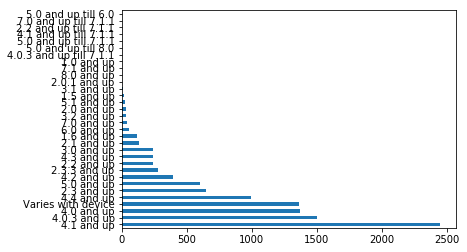

In [ ]:
data['Android Ver'].value_counts().plot(kind='barh')

### The majorty of the apps in the dataset require that mobile phones has an android version that's higher than 4.1

### Investegating the Last Updated column

In [ ]:
missing_values_count2 = data['Last Updated'].isnull().sum()

print("Missing values in Last Updated: ",missing_values_count2)

Missing values in Last Updated:  0


In [ ]:
unique_last_updated = data['Last Updated'].unique()

print("Unique values in Last Updated: \n",unique_last_updated)

Unique values in Last Updated: 
 ['January 7, 2018' 'January 15, 2018' 'August 1, 2018' ...
 'January 20, 2014' 'February 16, 2014' 'March 23, 2014']


In [ ]:
count_last_updated = data['Last Updated'].value_counts()

print("Count of values in Last Updated: \n",count_last_updated)

Count of values in Last Updated: 
 August 3, 2018        326
August 2, 2018        304
July 31, 2018         294
August 1, 2018        285
July 30, 2018         211
July 25, 2018         164
July 26, 2018         161
August 6, 2018        158
July 27, 2018         151
July 24, 2018         148
July 23, 2018         127
July 16, 2018         126
July 19, 2018         126
July 18, 2018         123
July 11, 2018         106
August 4, 2018        105
July 12, 2018         103
July 5, 2018           93
July 17, 2018          92
July 3, 2018           90
July 9, 2018           89
July 20, 2018          88
July 13, 2018          81
May 24, 2018           69
July 6, 2018           63
June 27, 2018          63
June 26, 2018          60
June 25, 2018          56
May 25, 2018           56
June 13, 2018          54
                     ... 
September 22, 2014      1
April 25, 2014          1
December 23, 2013       1
May 9, 2013             1
May 6, 2014             1
September 4, 2016       1
Feb

In [ ]:
count_last_updated = data['Last Updated'].value_counts()

print("Count of values in Last Updated: \n",count_last_updated)

Count of values in Last Updated: 
 August 3, 2018        326
August 2, 2018        304
July 31, 2018         294
August 1, 2018        285
July 30, 2018         211
July 25, 2018         164
July 26, 2018         161
August 6, 2018        158
July 27, 2018         151
July 24, 2018         148
July 23, 2018         127
July 16, 2018         126
July 19, 2018         126
July 18, 2018         123
July 11, 2018         106
August 4, 2018        105
July 12, 2018         103
July 5, 2018           93
July 17, 2018          92
July 3, 2018           90
July 9, 2018           89
July 20, 2018          88
July 13, 2018          81
May 24, 2018           69
July 6, 2018           63
June 27, 2018          63
June 26, 2018          60
June 25, 2018          56
May 25, 2018           56
June 13, 2018          54
                     ... 
September 22, 2014      1
April 25, 2014          1
December 23, 2013       1
May 9, 2013             1
May 6, 2014             1
September 4, 2016       1
Feb

In [ ]:
missing_values_count1 = data['Android Ver'].isnull().sum()

# look at the # of missing points in the first ten columns
print("Missing values in Android Ver: ",missing_values_count1)

Missing values in Android Ver:  0


### The last updated column has a non common representation of dates so converting this representation would make investegating more reliable

In [ ]:
months = data['Last Updated'].str.split(' ').str[0]
months[months=='January'] ="1"
months[months=='August'] ="8"
months[months=='June'] ="16"
months[months=='March'] ="3"
months[months=='September'] ="9"
months[months=='July'] ="7"
months[months=='October'] ="10"
months[months=='November'] ="11"
months[months=='May'] ="5"
months[months=='December'] ="12"
months[months=='February'] ="2"
months[months=='April'] ="4"
years = data['Last Updated'].str.split(', ').str[1]

temp = data['Last Updated'].str.split(',').str[0]

date = months+'-'+years

data['Last Updated'] = date

In [ ]:
len(data['Last Updated'].unique())

88

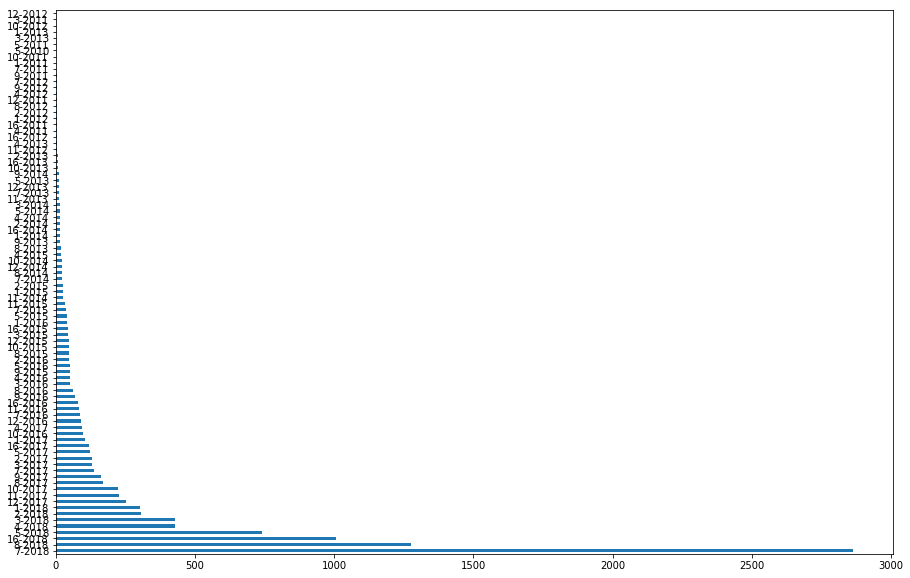

In [ ]:
data['Last Updated'].value_counts().plot(kind='barh',figsize=(15,10))

### Most of the apps in this dataset are not recently updated as all of them are last updated before 7-2018

### Relation between Android Ver and Rating

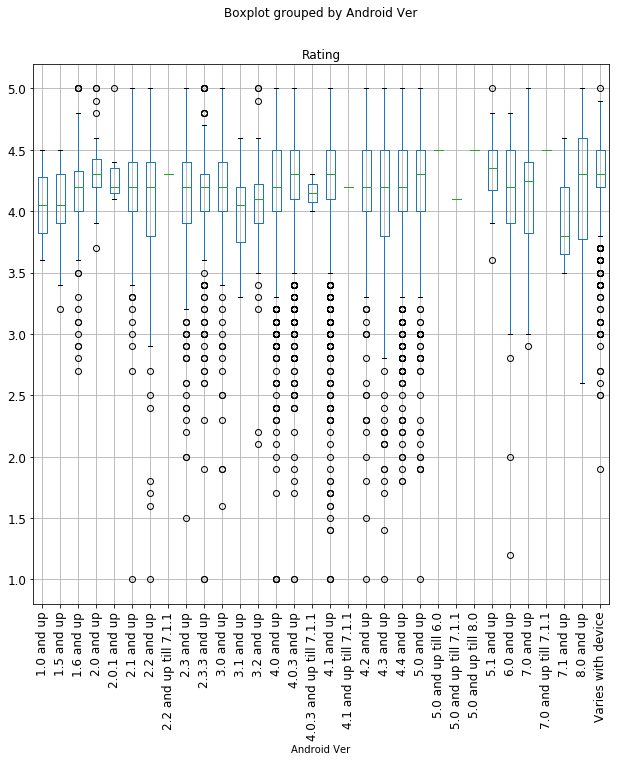

In [ ]:
data.boxplot(column='Rating', by='Android Ver',rot=90, fontsize=12, figsize=(10,10), grid=True)

#### <span style="color:Green">As shown, the average rating of each android version ranges between two close numbers so that indicated that there's no effect of correlation between the android version that the app requires and the rating of that app</span>

### Relation between Last Updated and Rating

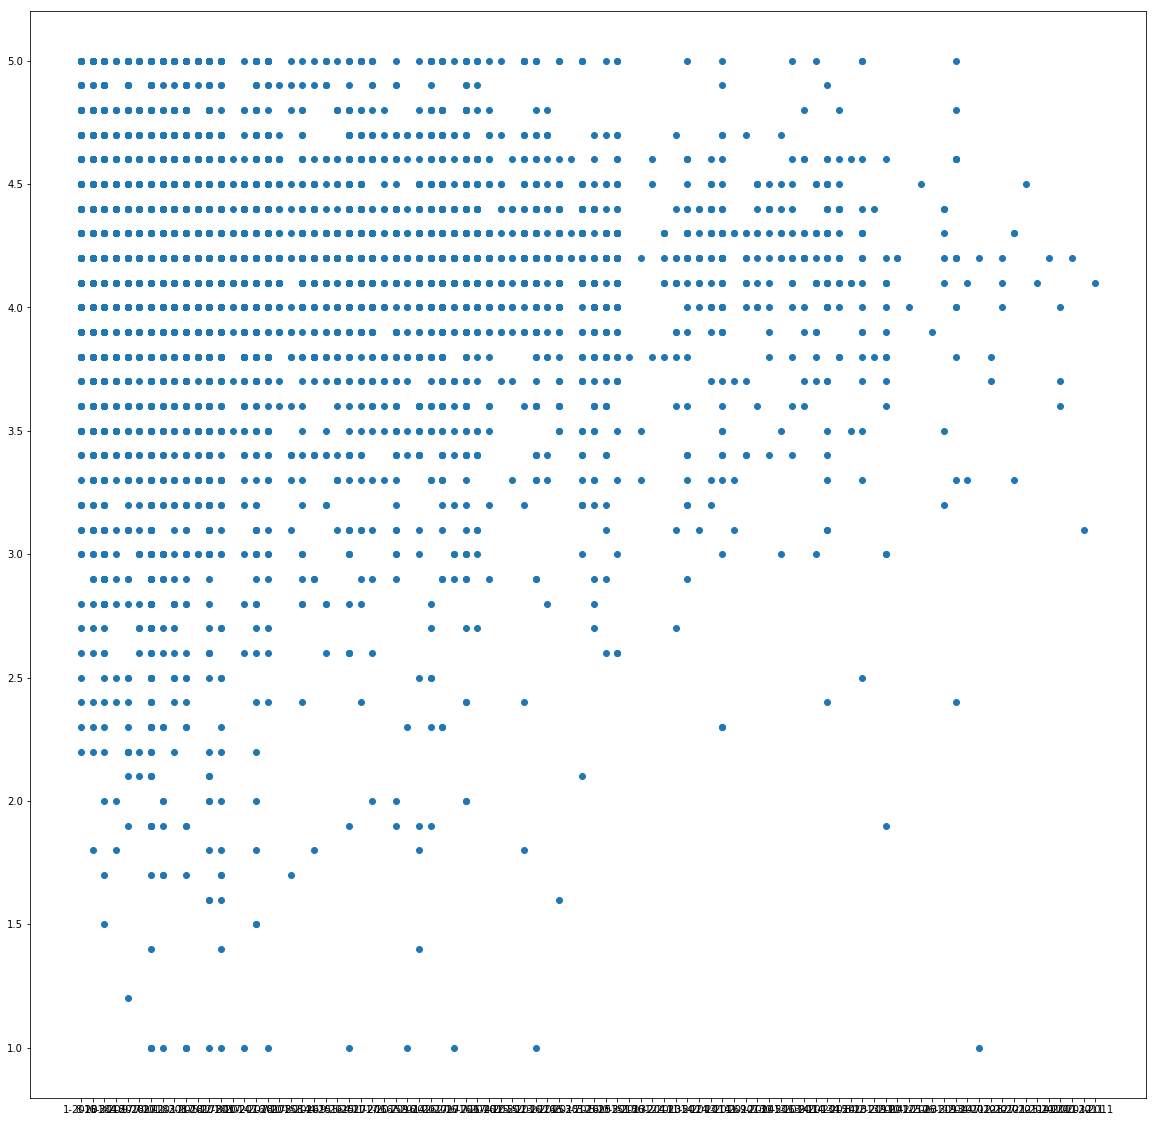

In [ ]:
plt.figure(figsize=(20,20))

plt.scatter(data['Last Updated'], data['Rating'])

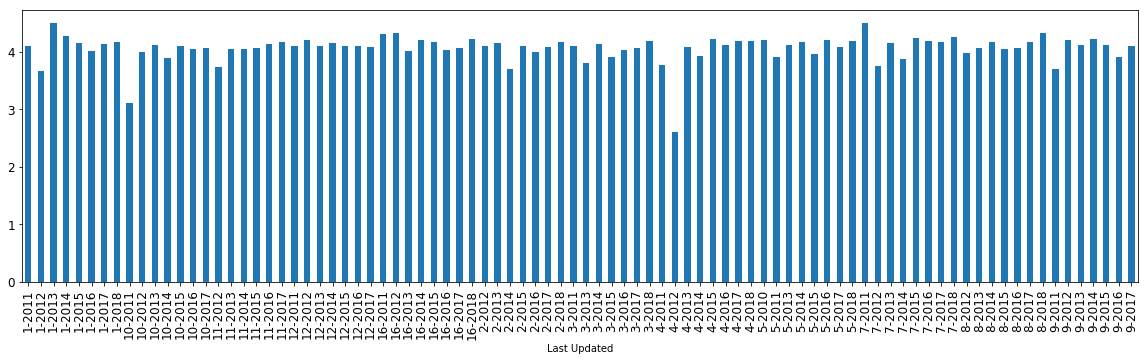

In [ ]:
data.groupby(['Last Updated']).Rating.mean().plot(kind='bar',figsize=(20,5),fontsize=12,rot=90)

#### <span style="color:Green">As shown from both the scatter plot and the bar chart the rating has no relation what so ever with date when it was last updated, the scatter plot shows no grouping or shape of scattered points and the bar chart shows that the rating is mostly always slightly less than or more than or equal to 4</span>

In [ ]:
dataSet = data

## Type

In [ ]:
dataSet['Type'].describe()

count     10839
unique        2
top        Free
freq      10039
Name: Type, dtype: object

In [ ]:
dataSet['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

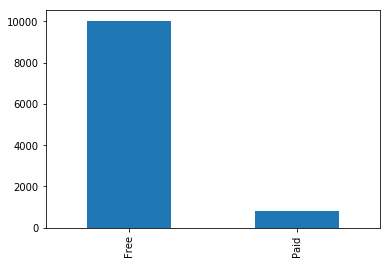

In [ ]:
dataSet['Type'].value_counts().plot(kind='bar')

#### <span style="color:Green">We can now conclude the following about Type attribute:</span>

1. As the total number of records now = 10840, and here the counts = 10839 which means and as shown before that there is one record that has null value for Type.
2. There are two unique values for Type which are Free and Paid where most of the apps are Free.

In [ ]:
dataSet[dataSet['Type'].isnull()]

In [ ]:
dataSet['Type'].value_counts()

In [ ]:
dataSet['Type'].fillna('Free', inplace = True) 

In [ ]:
dataSet.isnull().sum()

#### As there is only one missing value and approximately 93% of the apps are Free so it more likely to replace the null value with Free

### Relation between Type and Rating  

In [ ]:
plt.scatter(dataSet['Rating'], dataSet['Type'])

plt.title('Relation between Type and Ratings')

plt.xlabel('Rating')

plt.ylabel('Type')

plt.show()

In [ ]:
dataSet.boxplot(column='Rating', by='Type',rot=90, fontsize=12, figsize=(10,5), grid=True)

### Conclusion

#### <span style="color : Green">There is no relation between the increase of rating and whether the app is free or paid as it is shown clearly in the scatter plot and also box plot shows that both categories of paid and free have very similar mean and standard deviation.

## Price

In [ ]:
dataSet['Price'].describe()

In [ ]:
dataSet['Price'].unique()

This describes that all records have Price attribute, where most of the apps' price equal to zero which means most of the apps are free which is concluded also in the type part. Also, we can deduce that the currency of the data is dollar. However, we need to represent Price as numeric for better visualization.

In [ ]:
dataSet['Price'] = dataSet['Price'].apply(lambda x: x.replace('$',''))
dataSet['Price'] = dataSet['Price'].apply(lambda x: float(x))

We have removed the dollar sign then transformed string to float.

In [ ]:
dataSet['Price'].describe()

In [ ]:
plt.scatter(dataSet['Rating'], dataSet['Price'])

plt.title('Relation between Price and Ratings')

plt.xlabel('Rating')

plt.ylabel('Price')

plt.show()

In [ ]:
dataSet.boxplot(column='Rating', by='Price',rot=90, fontsize=12, figsize=(20,5), grid=True)

In [ ]:
dataSet['Price'].corr(dataSet['Rating'])

## Conclusion

#### <span style="color : Green">From the scatter plot we can see that free apps and the ones with low cost have wide range of rating, while the apps with higher price most of the time gives high rating. By calculating correlation it gives us very low value that is hard to be considered.</span>

## Here we will check if there is a correlation between the number of reviews and the rating for an App .Since Reviews doesn't contain null values  and it is numerical so we directly used  a scatter plot to investigate the realtion between it and the imputed Ratings cloumn.

In [ ]:
plt.scatter(dataSet.Rating,dataSet.Reviews)

#### <span style="color:Green">  From the Scatter plot we can see that there is no relation between the number Reviews and the Rating for an app </span>

#### HERE we will apply transformation to installs into numerical value to use a scatter plot to investigate the relation between the Rating and the number of Installs .

###  Transform Installs to Numerical Value

In [ ]:
installsNew = [] # define array structure
for installsNum in dataSet["Installs"]:
    if(installsNum[len(installsNum)-1]=="+"):
        install=(installsNum[:len(installsNum)-1]).replace(',','')
    elif(installsNum[len(installsNum)-1]=="0"):
        install=installsNum
   
    install=int(install)
    installsNew.append(install)
dataSet["InstallsNumerical"] = installsNew

In [ ]:
dataSet

### After tranforming the Installs attribue into numeriacal attribute the correlation between the number of installs (installsNumerical) and the Ratings can be visited using a scatter plot. 

In [ ]:
installs=dataSet.Installs.unique()
installs

In [ ]:
dataSet.InstallsNumerical.value_counts()

In [ ]:
plt.scatter(dataSet.Rating, dataSet.InstallsNumerical)

In [ ]:
dataSet.groupby('Category').InstallsNumerical.mean().plot(kind='bar')

### <span style="color:Green"> The histogram above shows that the highest Mean of installs is for the COMMUNICATION apps  </span> 

### But may be there is no correlation because the values of the installs are very large so Now we will try to Normalize the InstallsNumerical Values using the MInMax Normalization so that the values of installs and the values of the rating Ranges are close !!

In [ ]:
installsNewNormalized = [] # define array structure
maxValue=dataSet.InstallsNumerical.max()
minValue=dataSet.InstallsNumerical.min()

for installsNum in dataSet["InstallsNumerical"]:
    normalizedValue=(((installsNum-minValue)/(maxValue-minValue))/(1-0))+0
    installsNewNormalized.append(normalizedValue)
dataSet["NormalizedInstalls"] =installsNewNormalized

In [ ]:
dataSet

In [ ]:
dataSet.NormalizedInstalls.unique()

In [ ]:
plt.scatter(dataSet.Rating, dataSet.NormalizedInstalls)

### <span style="color:Green">There is no much difference still there is no correlation </span>

### Now investigate the correlation between the Rating and the size (the size has a value called Varies with device and this value means that the size of the application varies with the device)

### Transform Size to Numerical Value 

In [ ]:
sizeNumerical = [] # define array structure
for size in dataSet["Size"]:
    if(size[len(size)-1]=='M'):
        num=float(size[:len(size)-1])
        sizeNumerical.append(num*1000000)
    elif(size[len(size)-1]=='K'):
        num=float(size[:len(size)-1])
        sizeNumerical.append(num*1000)
    elif(size[len(size)-1]=='e'):
        sizeNumerical.append(0)
    else:
        sizeNumerical.append(0)
        

### Discretize the Numerical Size attribute 

In [ ]:
sizeDiscretized = []
for size in sizeNumerical:
    if size == -1:
        sizeDiscretized.append("varies with device")
    elif 0 <= size <= 100:
        sizeDiscretized.append("0-10*2")
    elif  100< size <= 10000:
         sizeDiscretized.append("10*2-10*4")
    elif 10000 < size <= 1000000:
        sizeDiscretized.append("10*4-10*6")
    elif 1000000 < size <=100000000:
        sizeDiscretized.append("10*6-10*8")
dataSet["SizeDiscretized"] = sizeDiscretized        
    

In [ ]:
dataSet

### Discretize the rating to be seen as a Categorical variable so that we can use the chi-square test

In [ ]:
dataSet["RatingDiscretized"] = dataSet["Rating"].apply(lambda x: int(round(x)))
dataSet.head()

### Apply the chi-square test on the  Rating and discretized size to investigate the relationship between the 2 attributes 

In [ ]:
contengency_table = pd.crosstab(dataSet["RatingDiscretized"],dataSet["SizeDiscretized"], margins= False)
contengency_table

In [ ]:
st.chi2_contingency(contengency_table)

#### <span style="color:Green"> The chi-square test showed that the degree of freedom(columns -1)*(rows-1)=76 and a P value <.05 the null hypothesis is rejected and the two attributes are correlated. </span>

### <span style="color:Blue"> Final Analysis </span>

### <span style="color:indigo"> What did we learn about the data? </span>

#### <span style="color:Black"> The DataSet has 13 Features, with more than 10,000 records, explaining some Applications in the Android DataStore. These features includes categorical data like the category of the App and its genre, and some numerical data like the rating and the number of reviews.</span>

1. #### <span style="color:Black"> The categories of the App at first were discovered to be 34 unique values, after cleaning it ended up to be 33 only because on of the categories was set as "1.9" which in the scope of the data is meaningless. An Example of the category values is Family, for which the apps moslty belong under it.</span>

2. #### <span style="color:Black"> The Genres of the Apps were at first 119 unique values including the ones with the subgenres. But the subgeneres were excluded leaving only the main genres because most of the records with the subgenres were present only once..</span>

3. #### <span style="color:Black"> The rating of the applications ranged from 1 to 5, after removing a record which contained a rating to be 19. There were 13% missing rating values which were imputed by the category rating mean.</span>

4. #### <span style="color:Black"> The Price of the apps have very wide range from 0 to 400, where the currency is dollars. </span>

5. #### <span style="color:Black"> The Type is categorical with the values
  * 'Free'
  * 'Paid' </span>

6. #### <span style="color:Black"> The Content Rating is categorical with the following values
    * 'Rating'
    * 'Adults only 18+'
    * 'Everyone'
    * 'Everyone 10+'
    * 'Mature 17+'
    * 'Teen' </span>

7. #### <span style="color:Black"> The Current Version </span>

8. #### <span style="color:Black"> The Android Version </span>

9. #### <span style="color:Black"> The Reviews </span>

10. #### <span style="color:Black"> The Size </span>

11. #### <span style="color:Black"> The Last Updated </span>

12. #### <span style="color:Black"> The Installs </span>

13. #### <span style="color:Black"> The App column which represents the name of the App. </span>

### <span style="color:Indigo">  The Question was how can application receive a high rating? Is there a relation between the rating and the category? Is there a relation between the content rating and the category? The question was asked for each feature in the dataSet and Visualizations were done accordingly. </span>

#### <span style="color:Black"> The data was cleaned, at first the rating null values where imputed by the category Rating mean, then each column was investigated with rating column searching for relations. </span>

1. #### <span style="color:Black"> Category and Rating : visualizations were made to see if the mean rating changes according the catergry, also a box plot to see the min and max rating for each category, the results showed that the avegrage category rating is nearly the same for all the category indicating that the category doesnt affect the rating in general</span>

2. #### <span style="color:Black"> Genres and Rating: The subgenres were removed leaving only the main genres , however the genres showed the same behaviour as the category indicating no relation. </span>

3. #### <span style="color:Black"> Price and Rating: using scatter plot and box plot to visualize the realtion between Price and Rating and found that the apps with very high price most probably have high Rating but they don't show strong correlation when method "corr" have used as it gives very low value that can be neglected. </span>

4. #### <span style="color:Black"> Type and Rating: using scatter plot and box plot to visualize if there is a relation between Type and Rating and it was very clear that there is no relation.</span>

5. #### <span style="color:Black"> ContentRating and Rating </span>

6. #### <span style="color:Black"> CurrentVersion and Rating </span>

7. #### <span style="color:Black"> AndroidVersion and Rating </span>

8. #### <span style="color:Black"> Reviews and Rating </span>

9. #### <span style="color:Black"> Size and Rating </span>

10. #### <span style="color:Black"> Size and Rating </span>

11. #### <span style="color:Black"> Installs and Rating </span>